In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('vehicle.csv')

In [3]:
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
df.shape

(846, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [8]:
df_nonnumeric= df.iloc[:,-1]
df_numeric= df.iloc[:,:-1]

In [9]:
df_numeric.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [10]:
df_numeric.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [11]:
column = df_numeric.columns

In [12]:
length = len(column)

In [13]:
for i in range(0,length):
    df_numeric[column[i]].fillna(df_numeric[column[i]].median(), inplace = True)

In [14]:
df.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

In [15]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [16]:
pt.fit(df_numeric)
orig_df = pd.DataFrame(pt.fit_transform(df_numeric))
orig_df.columns = df_numeric.columns
orig_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.250889     0.580135              0.097253      0.349942   
1    -0.247957    -0.576832              0.160094     -0.816888   
2     1.227603     0.873652              1.471555      1.180118   
3     0.007051    -0.576832              0.034093     -0.220848   
4    -1.088077    -0.053863             -0.750785      1.079043   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.460002                 0.747156      -0.041313   
1             -0.648789                 0.435588      -0.511247   
2              0.793256                 0.747156       1.155070   
3              0.383072                 0.435588      -0.712978   
4              3.209391                 3.973288      -0.511247   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.163051               -0.019052                   0.792459   
1       0.539220               -0.525853                  -0.284310   
2      -1.152131                1.045385                   0.729773   
3       0.662983               -0.525853                  -0.284310   
4       0.539220               -0.525853                  -0.212040   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.293757          -0.118211                   0.349953   
1        -0.522119          -0.504364                  -0.461911   
2         1.114092           1.149019                   1.341615   
3        -0.935944          -0.695261                  -1.574168   
4         1.523408          -0.548251                   0.467024   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.209612        0.148898          0.535243   
1                     0.117730        0.681443          0.342020   
2                     0.268943        1.379928         -0.215881   
3                    -1.686670        0.148898         -0.093508   
4                     3.312080        0.681443          0.022763   

   skewness_about.2  hollows_ratio  
0         -0.261662       0.133806  
1          0.071166       0.414230  
2         -0.093673      -0.003447  
3          1.561779       1.617513  
4         -1.532626      -1.616862

In [17]:
orig_df.skew()

compactness                    0.020835
circularity                    0.009902
distance_circularity          -0.029340
radius_ratio                  -0.006298
pr.axis_aspect_ratio          -0.099316
max.length_aspect_ratio       -0.183269
scatter_ratio                  0.049224
elongatedness                 -0.043290
pr.axis_rectangularity         0.124225
max.length_rectangularity      0.011789
scaled_variance                0.024486
scaled_variance.1              0.046460
scaled_radius_of_gyration     -0.009842
scaled_radius_of_gyration.1    0.001559
skewness_about                -0.086317
skewness_about.1              -0.096120
skewness_about.2               0.019008
hollows_ratio                 -0.040011
dtype: float64

In [18]:
df= pd.concat([orig_df,df_nonnumeric], axis=1)

In [19]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.250889     0.580135              0.097253      0.349942   
1    -0.247957    -0.576832              0.160094     -0.816888   
2     1.227603     0.873652              1.471555      1.180118   
3     0.007051    -0.576832              0.034093     -0.220848   
4    -1.088077    -0.053863             -0.750785      1.079043   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.460002                 0.747156      -0.041313   
1             -0.648789                 0.435588      -0.511247   
2              0.793256                 0.747156       1.155070   
3              0.383072                 0.435588      -0.712978   
4              3.209391                 3.973288      -0.511247   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.163051               -0.019052                   0.792459   
1       0.539220               -0.525853                  -0.284310   
2      -1.152131                1.045385                   0.729773   
3       0.662983               -0.525853                  -0.284310   
4       0.539220               -0.525853                  -0.212040   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.293757          -0.118211                   0.349953   
1        -0.522119          -0.504364                  -0.461911   
2         1.114092           1.149019                   1.341615   
3        -0.935944          -0.695261                  -1.574168   
4         1.523408          -0.548251                   0.467024   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.209612        0.148898          0.535243   
1                     0.117730        0.681443          0.342020   
2                     0.268943        1.379928         -0.215881   
3                    -1.686670        0.148898         -0.093508   
4                     3.312080        0.681443          0.022763   

   skewness_about.2  hollows_ratio class  
0         -0.261662       0.133806   van  
1          0.071166       0.414230   van  
2         -0.093673      -0.003447   car  
3          1.561779       1.617513   van  
4         -1.532626      -1.616862   bus

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

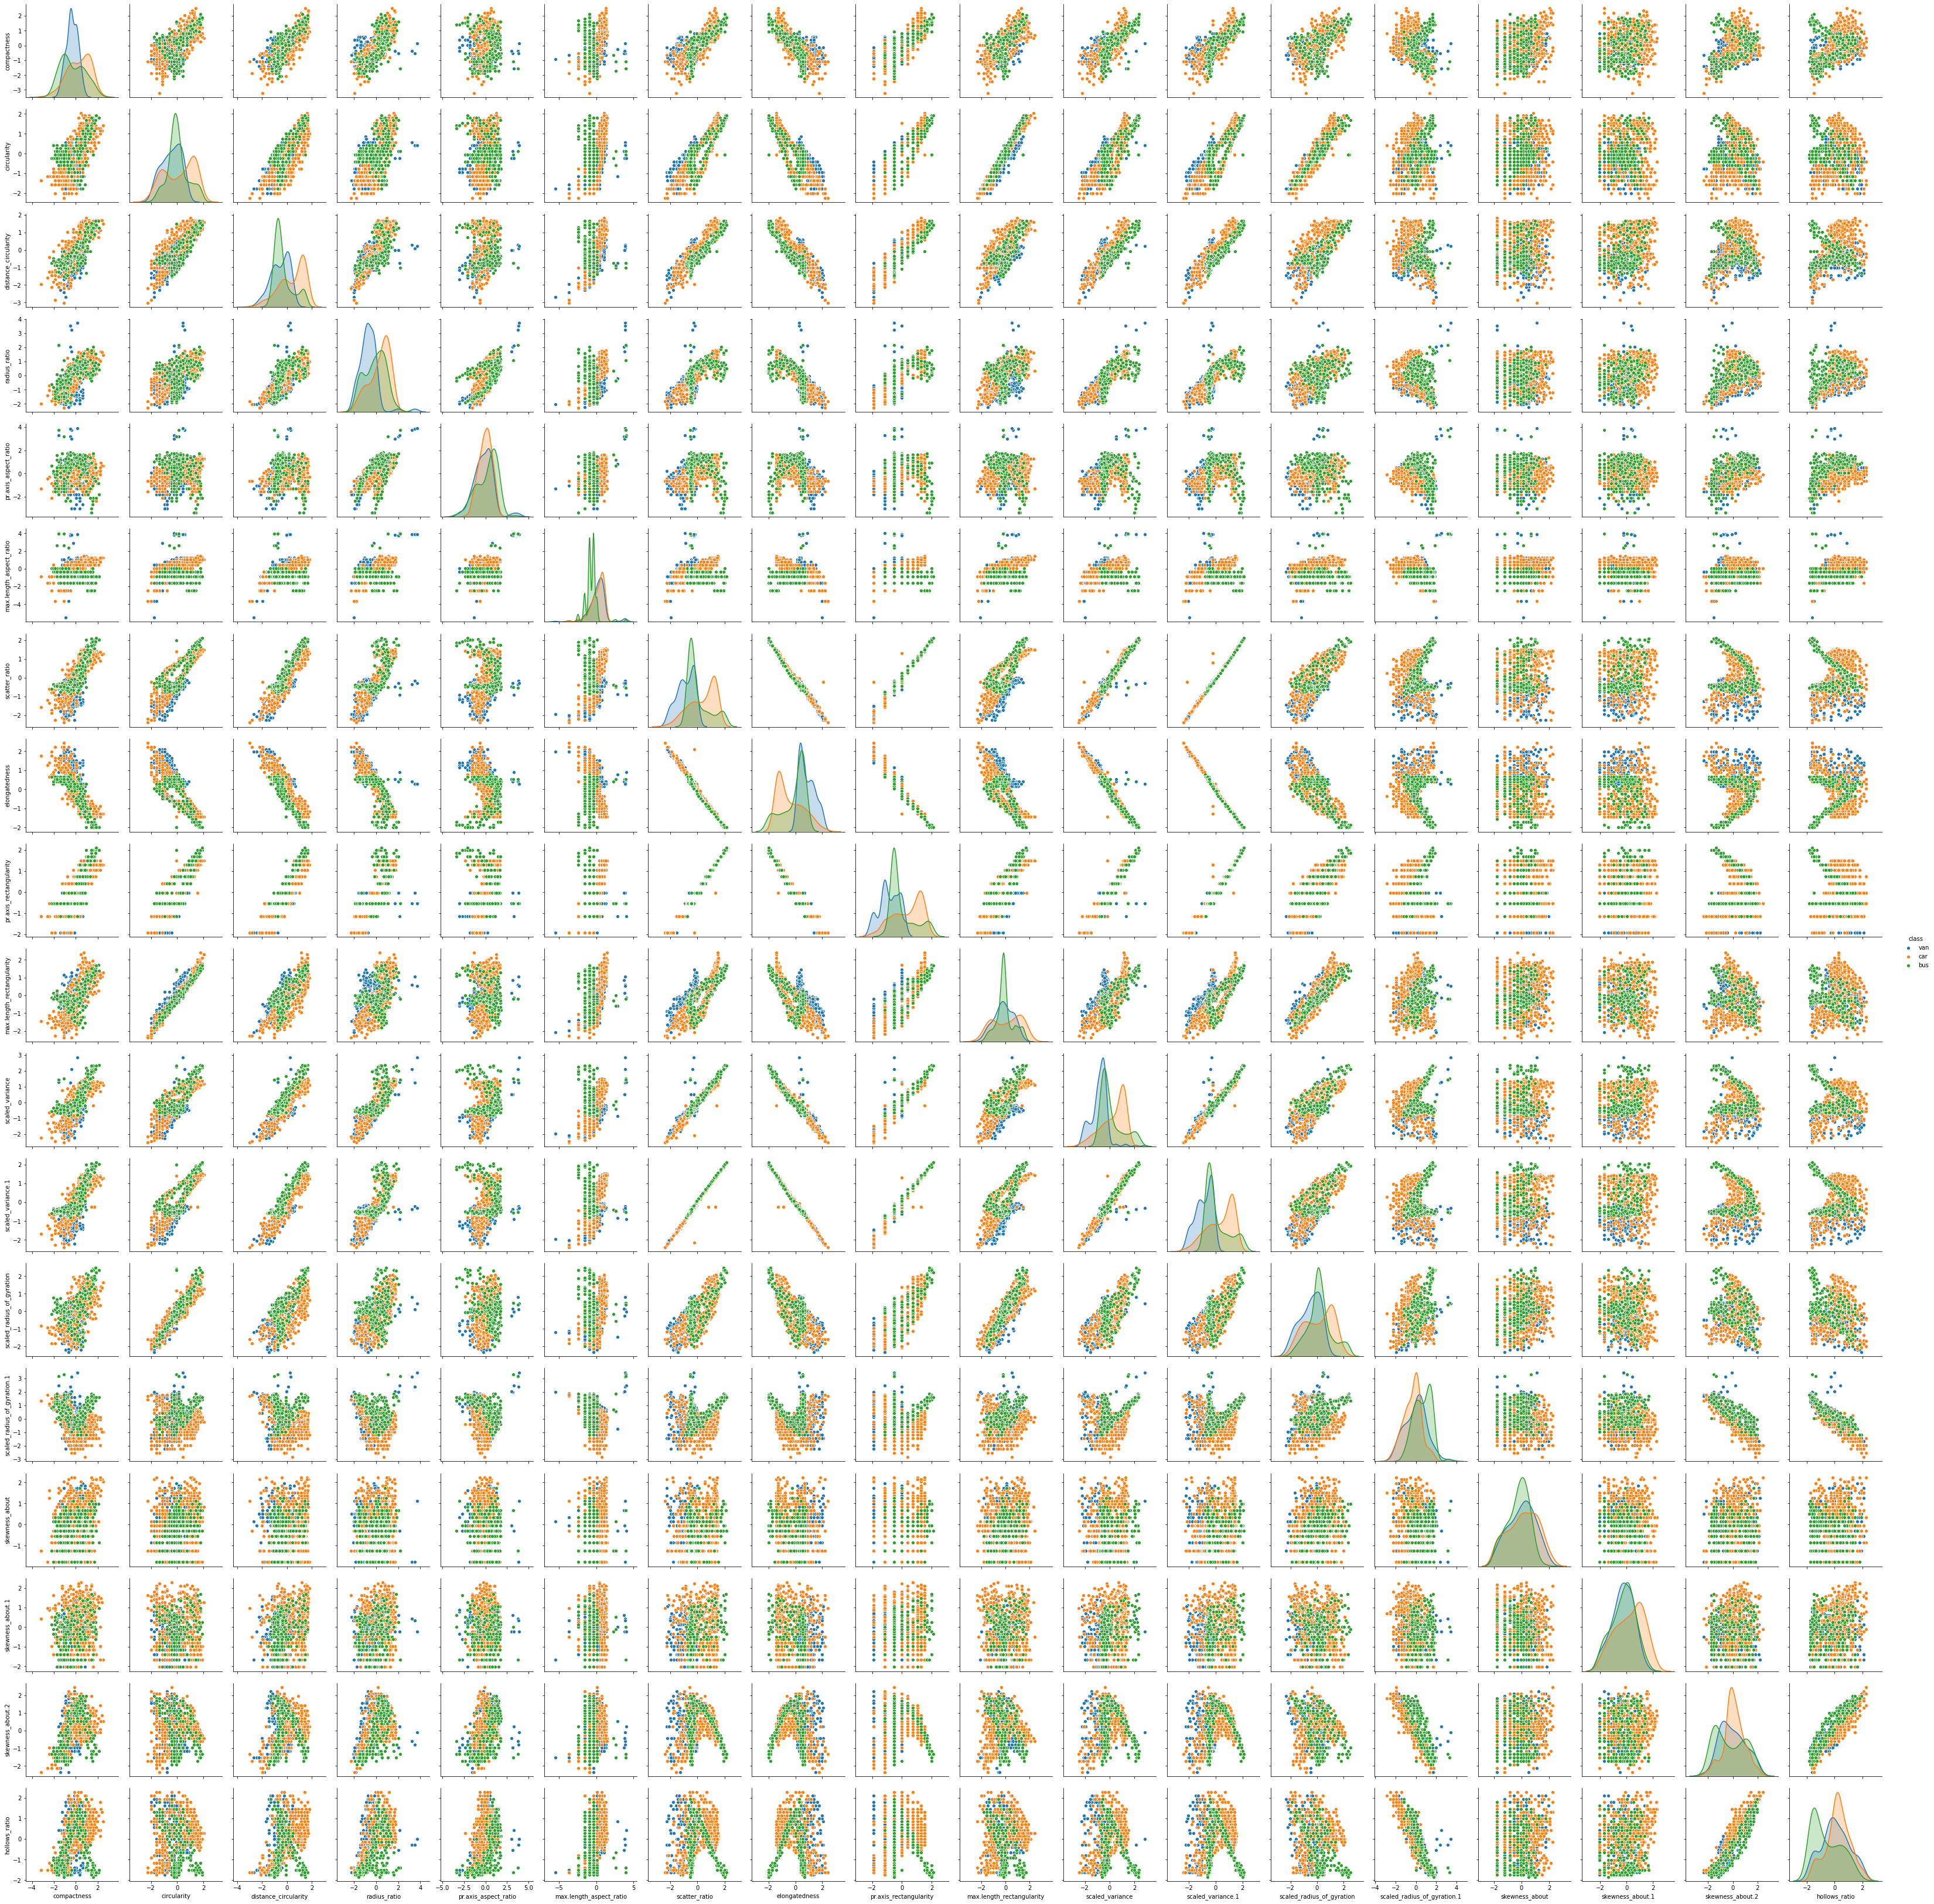

In [21]:
sns.pairplot(df, hue = 'class')

In [22]:
df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.648513              0.777662   
circularity                     0.648513     1.000000              0.780452   
distance_circularity            0.777662     0.780452              1.000000   
radius_ratio                    0.707969     0.614104              0.786261   
pr.axis_aspect_ratio            0.161585     0.189088              0.233360   
max.length_aspect_ratio         0.359017     0.458461              0.554384   
scatter_ratio                   0.771602     0.827850              0.914529   
elongatedness                  -0.784543    -0.816120             -0.911667   
pr.axis_rectangularity          0.776425     0.828516              0.911610   
max.length_rectangularity       0.654525     0.962441              0.766775   
scaled_variance                 0.741832     0.792711              0.884154   
scaled_variance.1               0.775228     0.821620              0.913681   
scaled_radius_of_gyration       0.543655     0.932274              0.690531   
scaled_radius_of_gyration.1    -0.271115     0.105080             -0.205292   
skewness_about                  0.197084     0.138196              0.084505   
skewness_about.1                0.143729    -0.030641              0.241224   
skewness_about.2                0.364105    -0.078661              0.192830   
hollows_ratio                   0.390185     0.029405              0.324180   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.707969              0.161585   
circularity                      0.614104              0.189088   
distance_circularity             0.786261              0.233360   
radius_ratio                     1.000000              0.685795   
pr.axis_aspect_ratio             0.685795              1.000000   
max.length_aspect_ratio          0.485509              0.308149   
scatter_ratio                    0.777654              0.207715   
elongatedness                   -0.804529             -0.241712   
pr.axis_rectangularity           0.761803              0.189232   
max.length_rectangularity        0.567679              0.144730   
scaled_variance                  0.820374              0.275515   
scaled_variance.1                0.790084              0.225100   
scaled_radius_of_gyration        0.525666              0.133556   
scaled_radius_of_gyration.1     -0.293409             -0.196320   
skewness_about                   0.031756             -0.051683   
skewness_about.1                 0.157922             -0.026461   
skewness_about.2                 0.449663              0.392798   
hollows_ratio                    0.492371              0.403622   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.359017       0.771602   
circularity                                 0.458461       0.827850   
distance_circularity                        0.554384       0.914529   
radius_ratio                                0.485509       0.777654   
pr.axis_aspect_ratio                        0.308149       0.207715   
max.length_aspect_ratio                     1.000000       0.413294   
scatter_ratio                               0.413294       1.000000   
elongatedness                              -0.390265      -0.993486   
pr.axis_rectangularity                      0.416005       0.986466   
max.length_rectangularity                   0.538460       0.791645   
scaled_variance                             0.430869       0.959768   
scaled_variance.1                           0.401119       0.994745   
scaled_radius_of_gyration                   0.326457       0.773461   
scaled_radius_of_gyration.1                -0.197144      -0.017400   
skewness_about                              0.026354       0.047472   
skewness_about.1                            0.112037       0.189254   
skewness_about.2                            0.

In [23]:
clf=svm.SVC()

In [24]:
X=df.iloc[:,:-1]
y= df.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [26]:
clf.fit(X_train, y_train)

SVC()

In [27]:
clf.score(X_test, y_test)

0.9566929133858267

In [28]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9566929133858267

In [29]:
pd.crosstab(y_test, y_pred)

col_0  bus  car  van
class               
bus     59    0    0
car      1  128    4
van      4    2   56

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.92      1.00      0.96        59
         car       0.98      0.96      0.97       133
         van       0.93      0.90      0.92        62

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254



In [31]:
X1=df.iloc[:,:-1]
y1= df.iloc[:,-1]

In [32]:
sc = StandardScaler()
X_std =  sc.fit_transform(X1)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.64928071  0.77858213  0.70880729  0.16177611  0.35944219
   0.77251518 -0.78547172  0.77734376  0.65530004  0.7427099   0.77614515
   0.54429887 -0.27143577  0.19731709  0.14389942  0.36453607  0.39064704]
 [ 0.64928071  1.00118343  0.78137544  0.61483087  0.1893121   0.45900331
   0.82882941 -0.81708621  0.82949691  0.96358033  0.79364869  0.82259206
   0.93337754  0.1052041   0.13835956 -0.0306774  -0.0787538   0.02943942]
 [ 0.77858213  0.78137544  1.00118343  0.78719134  0.23363637  0.55504022
   0.91561086 -0.91274554  0.91268863  0.76768225  0.88520049  0.91476224
   0.69134771 -0.20553513  0.08460481  0.24150986  0.19305789  0.32456351]
 [ 0.70880729  0.61483087  0.78719134  1.00118343  0.68660665  0.48608324
   0.77857472 -0.80548087  0.76270496  0.56835048  0.8213446   0.79101898
   0.52628834 -0.29375624  0.03179368  0.1581088   0.45019476  0.49295344]
 [ 0.16177611  0.1893121   0.23363637  0.68660665  1.00118343  0.30851409
   0.2079609

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.65249806e-01 -1.03022012e-01  2.41878917e-01 -1.68212796e-02
  -1.48092118e-01 -5.94202136e-02  1.61229043e-01 -8.27249133e-01
  -2.58635515e-01 -1.11120054e-01 -1.43186585e-01 -8.28627981e-02
  -7.26179018e-02 -9.62242849e-02 -4.81204894e-02  3.01778484e-02
  -4.75830215e-03  7.25499175e-03]
 [-2.83739997e-01  1.55767519e-01 -5.11666331e-03 -2.10371203e-01
   8.27583413e-02 -1.03537138e-01 -4.09070451e-01 -2.66692189e-02
  -8.33878765e-03  7.15939886e-02  4.64365455e-02  2.00194517e-01
   1.07243361e-01 -5.16262686e-01  5.72840539e-01  1.03747196e-01
  -2.91190097e-02 -1.05685825e-02]
 [-3.04039660e-01 -3.62756689e-02  7.30756307e-02  9.11467591e-02
   8.15573542e-02 -7.43393903e-02  1.15297741e-01  1.83306358e-01
  -3.74158779e-01 -2.76833875e-01  7.50965614e-01 -1.67097117e-01
  -1.49596638e-01  1.89889841e-02  3.61053590e-02 -2.78687230e-02
   8.49468526e-03 -1.13446286e-02]
 [-2.74143941e-01 -1.88579602e-01 -2.50161489e-01  2.92723167e-03
  -8.66319967e-02  

In [34]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]


eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)


eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]


print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.64104985312631, array([-0.26524981, -0.28374   , -0.30403966, -0.27414394, -0.10419572,
       -0.171618  , -0.3118946 ,  0.31250184, -0.31010735, -0.27575617,
       -0.30566223, -0.31215443, -0.25846428,  0.03596999, -0.03277335,
       -0.05168457, -0.05801276, -0.08948572])), (3.298696269122248, array([-0.10302201,  0.15576752, -0.03627567, -0.1885796 , -0.23549381,
       -0.10020513,  0.06259283, -0.03492182,  0.06869454,  0.14107999,
        0.06135972,  0.04944968,  0.23571734,  0.49504436, -0.02162802,
       -0.08908375, -0.50876505, -0.50882121])), (1.1973992330834702, array([-0.01682128, -0.2103712 ,  0.09114676,  0.00292723, -0.17134734,
       -0.10786554,  0.11710531, -0.10491826,  0.11525974, -0.2060556 ,
        0.11908566,  0.11051917, -0.221618  ,  0.04700176, -0.49301664,
        0.70478214, -0.07992261, -0.042357  ])), (1.1718387078485022, array([ 2.41878917e-01, -5.11666331e-03,  7.30756307e-02, -2.50161489e-01,
       -6.21822552e-01, -1.97812492e-01,  3.7781

In [35]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained) 

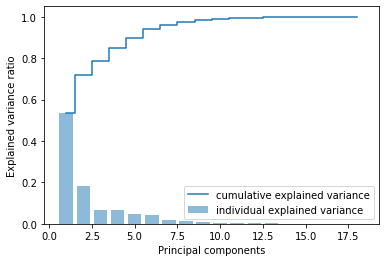

In [36]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [37]:
pca = PCA(n_components=9) # reducing the dimension to 9 from 19
X_pca = pca.fit_transform(X_std)

In [38]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_pca, y1, test_size=0.30, random_state=1)

In [39]:
clf.fit(X_train, y_train)

SVC()

In [40]:
clf.score(X_test, y_test)

0.9330708661417323

In [41]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9330708661417323

In [42]:
pd.crosstab(y_test, y_pred)

col_0  bus  car  van
class               
bus     58    1    0
car      1  126    6
van      5    4   53

In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.91      0.98      0.94        59
         car       0.96      0.95      0.95       133
         van       0.90      0.85      0.88        62

    accuracy                           0.93       254
   macro avg       0.92      0.93      0.92       254
weighted avg       0.93      0.93      0.93       254



--- End----